## Data Analysis And Machine Learning on Campus Placement Data

- **Explatory Data Analysis**
- **Prediction of wheather student gets placed or not (Binary Classification)**
- **Determining characteristics affecting placement**
- **Predition of Salary secured by a student (Regression)**
- **Determining characteristics affecting salary**

### Common Questions
* **Does GPA affect placement?**
* **Does Higher Secondary School's Percentage still affect campus placement?**
* **Is work experience required for securing good job?**
* **What factor affect the salary?**

**Let's find out**

# Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

# Loading Data

In [2]:
data = pd.read_csv("/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")
#Remove Serial Number
data.drop("sl_no", axis=1, inplace=True)

# Exploratory Data Analysis

### Pandas Profiler's Interactive Report  

In [3]:
data.profile_report(title='Campus Placement Data - Report', progress_bar=False)




* 67 Missing values in Salary for students who didn't get placed. **NaN Value needs to be filled**.

* **Data is not scaled**. Salary column ranges from 200k-940k, rest of numerical columns are percentages.

* 300k at 75th Percentile goes all the way up to 940k max, in Salary (high skewnwss). Thus, **outliers at high salary end**.

## Exploring Data by each Features

### Feature: Gender
#### Does gender affect placements?

In [4]:
data.gender.value_counts()
# Almost double

M    139
F     76
Name: gender, dtype: int64

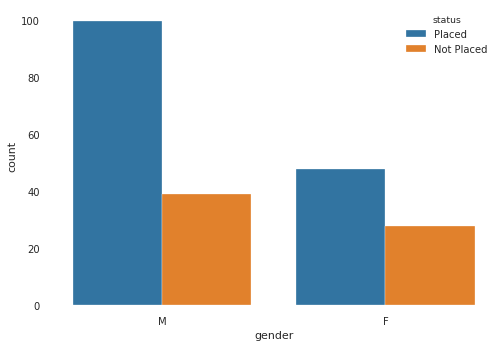

In [5]:
sns.countplot("gender", hue="status", data=data)
plt.show()

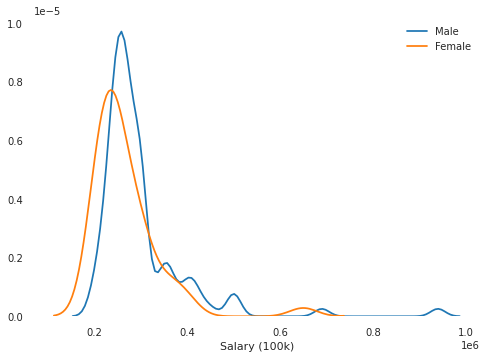

In [6]:
#This plot ignores NaN values for salary, igoring students who are not placed
sns.kdeplot(data.salary[ data.gender=="M"])
sns.kdeplot(data.salary[ data.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("Salary (100k)")
plt.show()

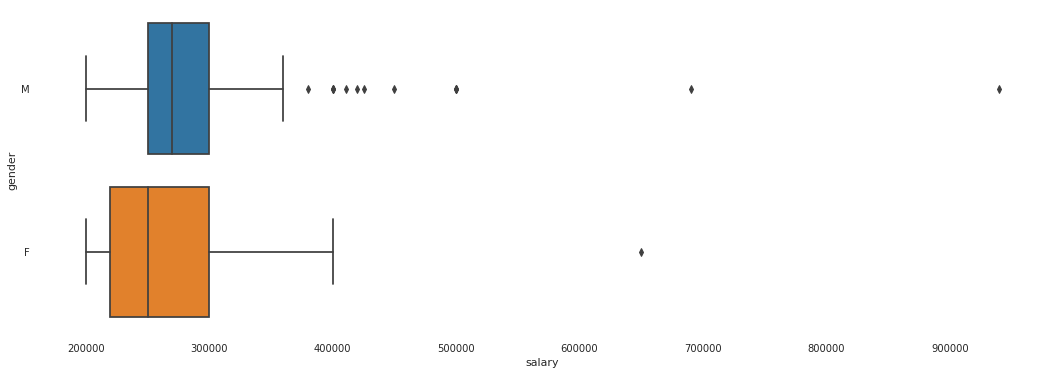

In [7]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "gender", data=data)
plt.show()

#### Insights

* We have samples of 139 Male studets and 76 Female students.
* 30 Female and 40 Male students are not placed. Male students have comparatively higher placemets. 
* More outliers on Male -> Male students are getting high CTC jobs.
* Male students are offered slightly greater salary than female on an average. 


### Feature: ssc_p (Secondary Education percentage), ssc_b (Board Of Education)
#### Does Secondary Education affect placements?

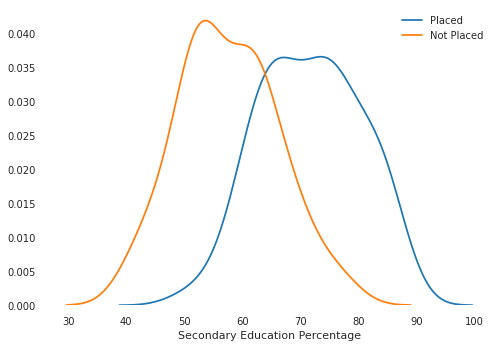

In [8]:
#Kernel-Density Plot
sns.kdeplot(data.ssc_p[ data.status=="Placed"])
sns.kdeplot(data.ssc_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()

* All students with Secondary Education Percentage above 90% are placed
* All students with Secondary Education Percentage below 50% are not-placed
* **Students with good Secondary Education Percentage are placed on average.**

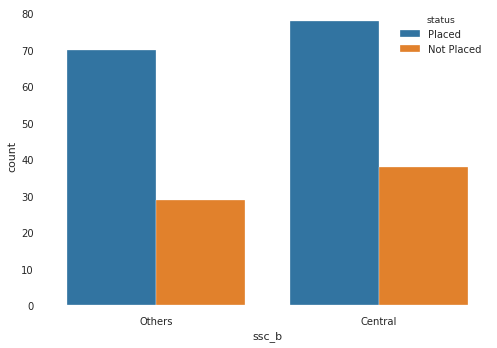

In [9]:
sns.countplot("ssc_b", hue="status", data=data)
plt.show()

* Board Of Education does not affect Placement Status much

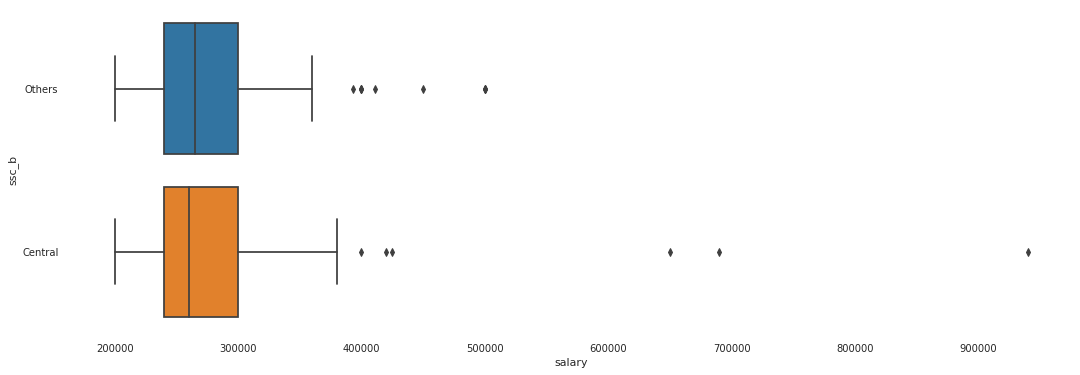

In [10]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "ssc_b", data=data)
plt.show()

* Outliers on both, but students from Central Board are getting the highly paid jobs.

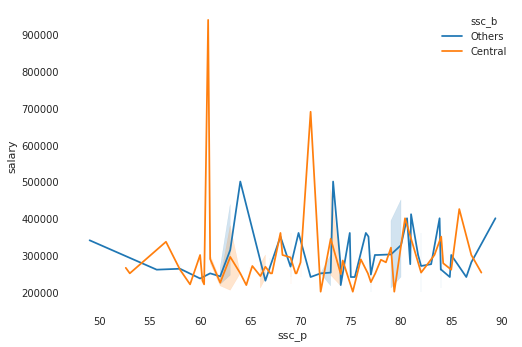

In [11]:
sns.lineplot("ssc_p", "salary", hue="ssc_b", data=data)
plt.show()

* No specific pattern (correlation) between Secondary Education Percentage and Salary.
* Board of Education is Not Affecting Salary

### Feature: hsc_p (Higher Secondary Education percentage), hsc_b (Board Of Education), hsc_s (Specialization in Higher Secondary Education)
#### Does Higher Secondary School affect Placements?

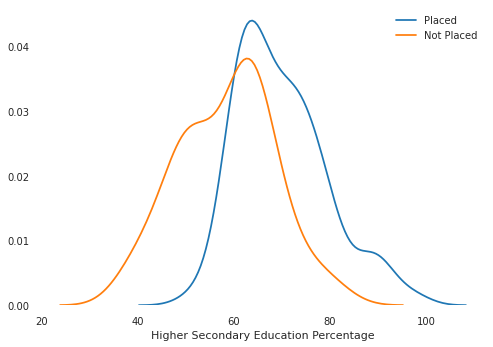

In [12]:
#Kernel-Density Plot
sns.kdeplot(data.hsc_p[ data.status=="Placed"])
sns.kdeplot(data.hsc_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Higher Secondary Education Percentage")
plt.show()

* Overlap here too. More placements for percentage above 65%
* Straight drop below 60 in placements -> Perntage must be atleast 60 for chance of being placed

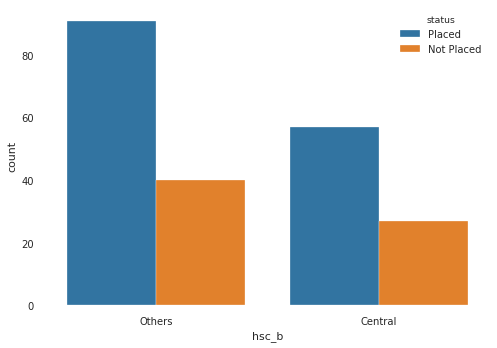

In [13]:
sns.countplot("hsc_b", hue="status", data=data)
plt.show()

Education Board again, doesn't affect placement status much

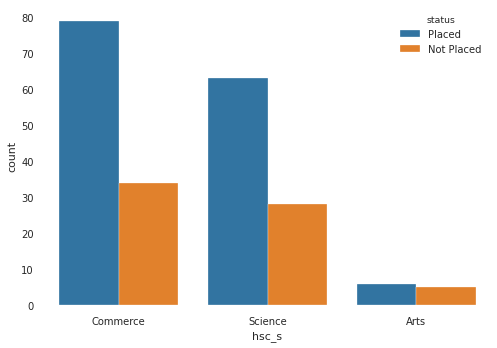

In [14]:
sns.countplot("hsc_s", hue="status", data=data)
plt.show()

* We have very less students with Arts specialization.
* Around 2:1 placed:unplaced  ratio for both Science and Commerse students


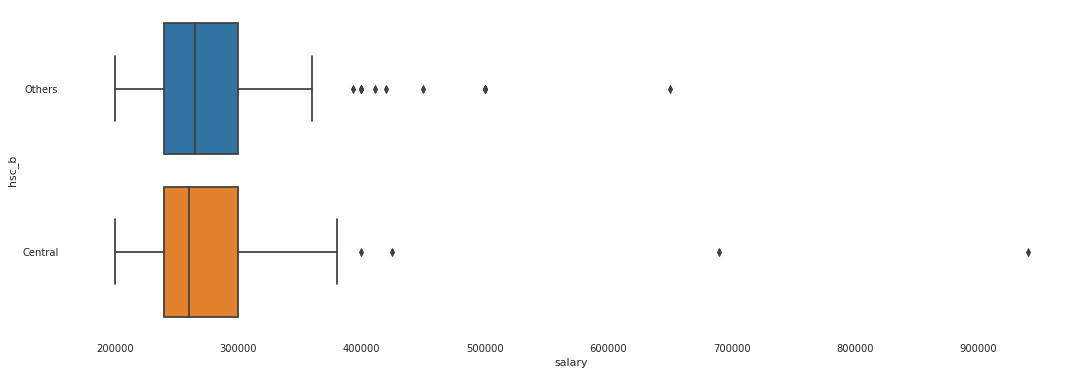

In [15]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "hsc_b", data=data)
plt.show()

* Outliers on both, board doesn't affect getting highly paid jobs. Highest paid job was obtailed by student from Central Board though.

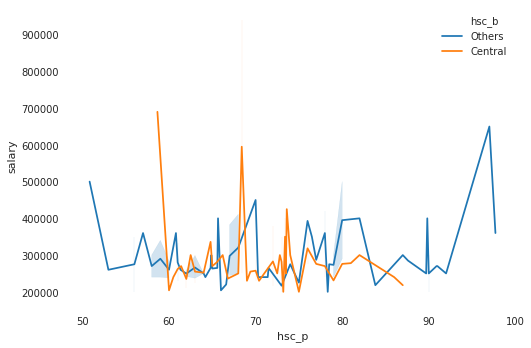

In [16]:
sns.lineplot("hsc_p", "salary", hue="hsc_b", data=data)
plt.show()

* High salary from both Central and Other. 
* High salary for both high and low percentage.
* Thus, both these feature doesnot affect salary.

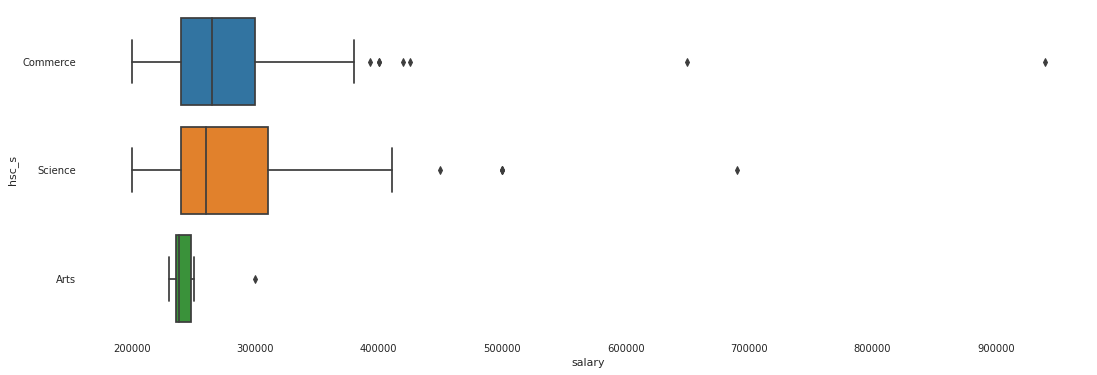

In [17]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "hsc_s", data=data)
plt.show()

* We can't really say for sure due to only few samples of students with Arts Major, but they aren't getting good salaries.

* Commerse students have slightly better placement status.

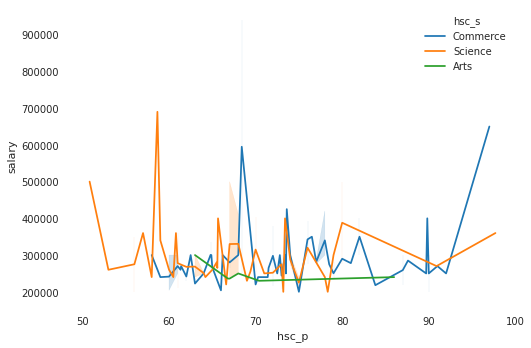

In [18]:
sns.lineplot("hsc_p", "salary", hue="hsc_s", data=data)
plt.show()

* **Student with Art Specialization surprisingly have comparatively low salary**

### Feature: degree_p (Degree Percentage), degree_t (Under Graduation Degree Field)
#### Does Under Graduate affect placements? 

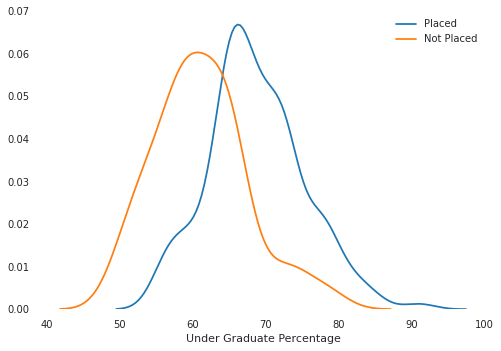

In [19]:
#Kernel-Density Plot
sns.kdeplot(data.degree_p[ data.status=="Placed"])
sns.kdeplot(data.degree_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Under Graduate Percentage")
plt.show()

* Overlap here too. But More placements for percentage above 65.
* UG Percentage least 50% to get placement

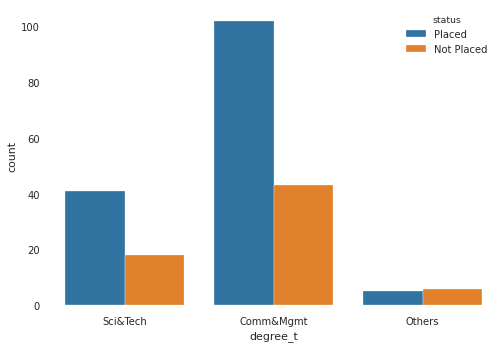

In [20]:
sns.countplot("degree_t", hue="status", data=data)
plt.show()

* We have very less students with "Other". We cant make decision from few cases.
* Around 2:1 placed:unplaced  ratio for both Science and Commerse students

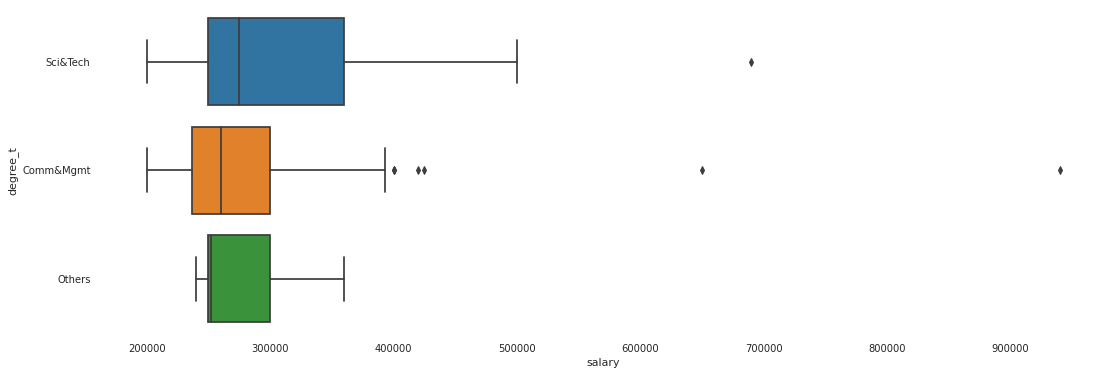

In [21]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "degree_t", data=data)
plt.show()

* Science&Tech students getting more salary on average
* Management stidents are getting more highly paid dream jobs. 

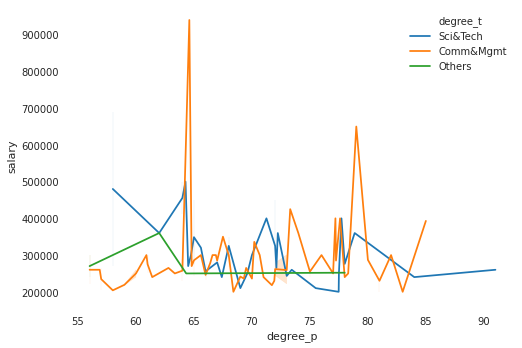

In [22]:
sns.lineplot("degree_p", "salary", hue="degree_t", data=data)
plt.show()

* Percentage does not seem to affect salary.
* Commerce&Mgmt students occasionally get dream placements with high salary

### Feature: workex (Work Experience)
#### Does Work Experience affect placements?

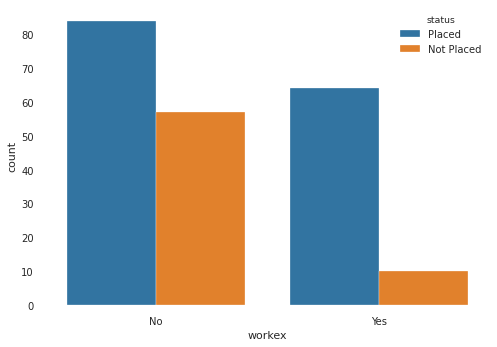

In [23]:
sns.countplot("workex", hue="status", data=data)
plt.show()

* **This affects Placement.** Very few students with work experience not getting placed!

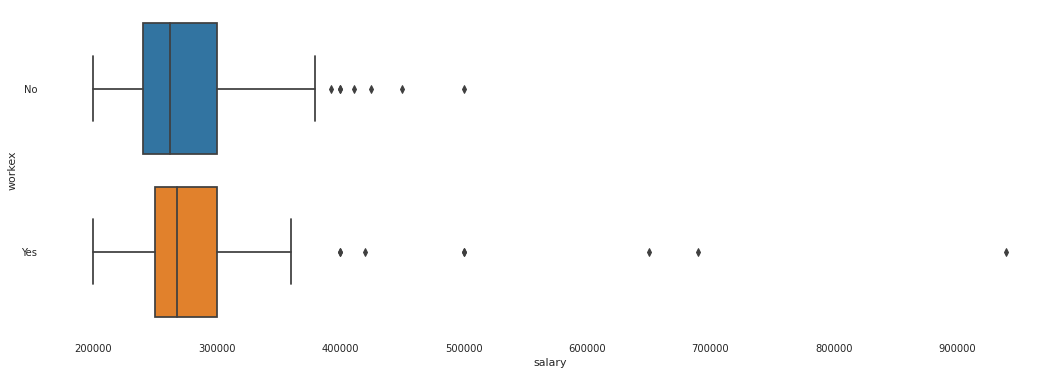

In [24]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "workex", data=data)
plt.show()

* Outliers (High salary than average) on bith end but **students with experience getting dream jobs**
* Average salary as well as base salary high for students with work experience.

### Feature: etest_p  (Employability test percentage)

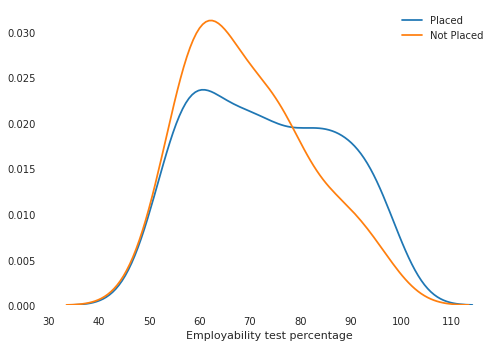

In [25]:
#Kernel-Density Plot
sns.kdeplot(data.etest_p[ data.status=="Placed"])
sns.kdeplot(data.etest_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Employability test percentage")
plt.show()

* High overlap -> It does not affect placement status much
* More "Not Placed" on percentage 50-70 range and more placed on 80% percentage range

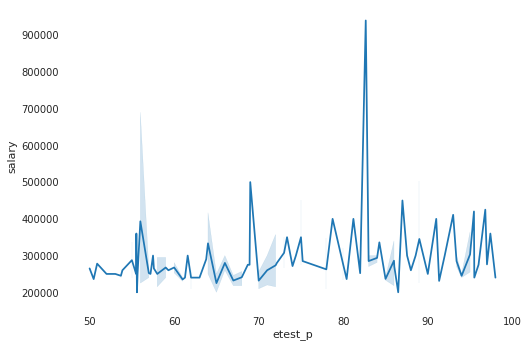

In [26]:
sns.lineplot("etest_p", "salary", data=data)
plt.show()

**This feature surprisingly does not affect placements and salary much**

### Feature: specialisation (Post Graduate Specialization)

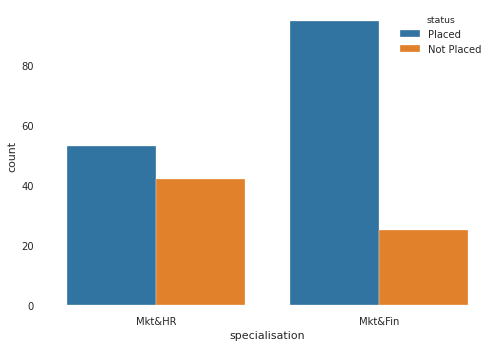

In [27]:
sns.countplot("specialisation", hue="status", data=data)
plt.show()

* This feature affects Placement status.
* Comparitively very low not-placed students in Mkt&Fin Section

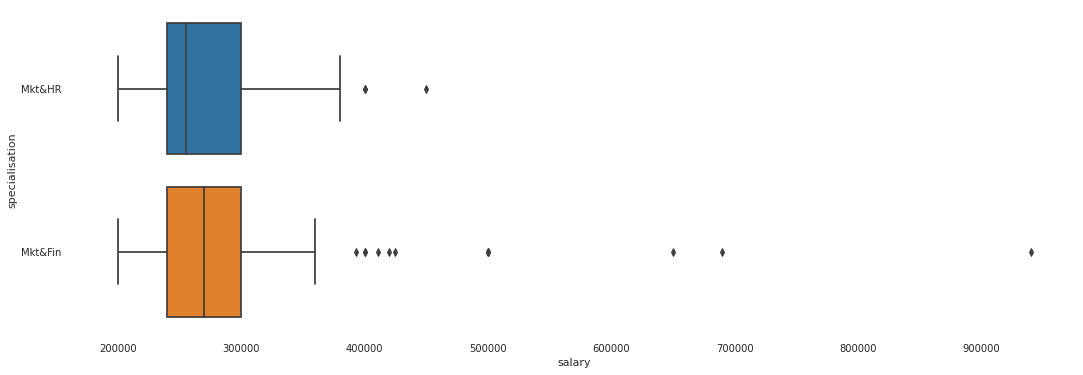

In [28]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "specialisation", data=data)
plt.show()

* **More Highly Paid Jobs for Mkt&Fin students **

### Feature: mba_p (MBA percentage)
#### Does MBA Percentage affect placements?

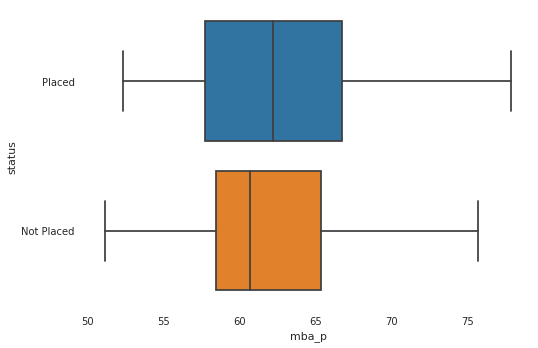

In [29]:
sns.boxplot("mba_p", "status", data=data)
plt.show()

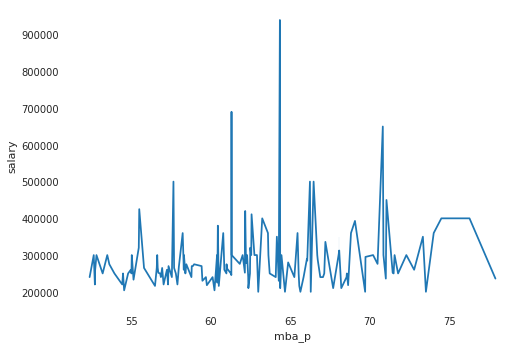

In [30]:
sns.lineplot("mba_p", "salary", data=data)
plt.show()

MBA Percentage also deos not affect salary much

# Feature Selection

Using Only following features (Ignoring Board of Education -> they didnt seem to have much effect)
* Gender
* Secondary Education percentage
* Higher Secondary Education Percentsge
* Specialization in Higher Secondary Education
* Under Graduate Dergree Percentage
* Under Graduation Degree Field
* Work Experience
* Employability test percentage
* Specialization
* MBA Percentage

Will compute feature importance later on.


# Data Pre-Processing

In [31]:
data.drop(['ssc_b','hsc_b'], axis=1, inplace=True)

## Feature Encoding

In [32]:
data.dtypes
# We have to encode gender,hsc_s, degree_t, workex, specialisation and status

gender             object
ssc_p             float64
hsc_p             float64
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [33]:
data["gender"] = data.gender.map({"M":0,"F":1})
data["hsc_s"] = data.hsc_s.map({"Commerce":0,"Science":1,"Arts":2})
data["degree_t"] = data.degree_t.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})
data["workex"] = data.workex.map({"No":0, "Yes":1})
data["status"] = data.status.map({"Not Placed":0, "Placed":1})
data["specialisation"] = data.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

# Problem Statement

* Predicting If Students gets placed or not (Binary Classification Problem)
* Predicting Salary of Student (Regression Problem)

In [34]:
#Lets make a copy of data, before we proceeed with specific problems
data_clf = data.copy()
data_reg = data.copy()

## Binary Classification Problem

### Decision Tree Based Models

**Using Decision Tree based Algorithm does not  require feature scaling, and works great also in presence of categorical columns without ONE_HOT Encoding**

In [35]:
# Library imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

### Dropping Salary Feature

Filling 0s for salary of students who didn't get placements would be bad idea as it would mean student gets placement if he earns salary.

In [36]:
# Seperating Features and Target
X = data_clf[['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p',]]
y = data_clf['status']

In [37]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [38]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [39]:
accuracy_score(y_test, y_pred)

0.8307692307692308

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73        22
           1       0.85      0.91      0.88        43

    accuracy                           0.83        65
   macro avg       0.82      0.79      0.80        65
weighted avg       0.83      0.83      0.83        65



In [41]:
#Using Random Forest Algorithm
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred)

0.8615384615384616

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.64      0.76        22
           1       0.84      0.98      0.90        43

    accuracy                           0.86        65
   macro avg       0.89      0.81      0.83        65
weighted avg       0.87      0.86      0.85        65



### Feature Importance (Percentage)

Tree based algorithms can be used to compute feature importance 

Checking feature importance obtained from these:

In [44]:
rows = list(X.columns)
imp = pd.DataFrame(np.zeros(6*len(rows)).reshape(2*len(rows), 3))
imp.columns = ["Classifier", "Feature", "Importance"]
#Add Rows
for index in range(0, 2*len(rows), 2):
    imp.iloc[index] = ["DecisionTree", rows[index//2], (100*dtree.feature_importances_[index//2])]
    imp.iloc[index + 1] = ["RandomForest", rows[index//2], (100*random_forest.feature_importances_[index//2])]

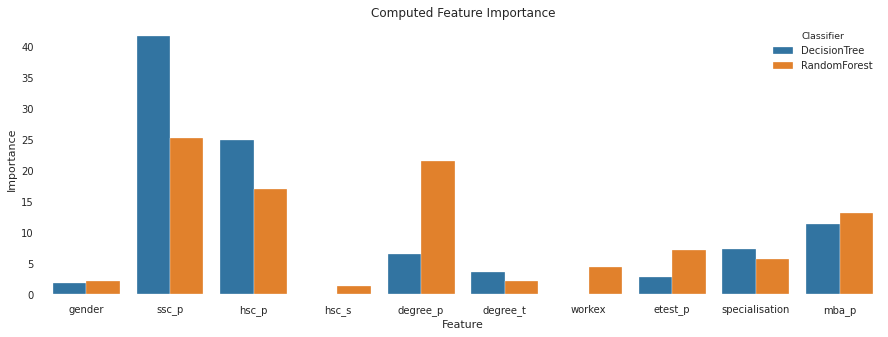

In [45]:
plt.figure(figsize=(15,5))
sns.barplot("Feature", "Importance", hue="Classifier", data=imp)
plt.title("Computed Feature Importance")
plt.show()

hsc_s -> Specialization in Higher Secondary Education

degree_t -> Under Graduation(Degree type)- Field of degree education

specialisation -> Post Graduation(MBA)- Specialization

**Field of study does not seem to affect much**

Optionally we can remove these least important features and re-clssify data.

### Binary Classification with Logistic Regression

### One Hot Encoding

Encoding Categorical Features 

In [46]:
# Seperating Features and Target
X = data_clf[['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p',]]
y = data_clf['status']
#Reverse Mapping and making Categorical
X["gender"] = pd.Categorical(X.gender.map({0:"M",1:"F"}))
X["hsc_s"] = pd.Categorical(X.hsc_s.map({0:"Commerce",1:"Science",2:"Arts"}))
X["degree_t"] = pd.Categorical(X.degree_t.map({0:"Comm&Mgmt",1:"Sci&Tech",2:"Others"}))
X["workex"] = pd.Categorical(X.workex.map({0:"No",1:"Yes"}))
X["specialisation"] = pd.Categorical(X.specialisation.map({0:"Mkt&HR",1:"Mkt&Fin"}))

In [47]:
#One-Hot Encoding
X = pd.get_dummies(X)
colmunn_names = X.columns.to_list()

### Feature Scaling

* Percentages are on scale 0-100 
* Categorical Features are on range 0-1 (By one hot encoding)
* High Scale for Salary -> Salary is heavily skewed too -> SkLearn has RobustScaler which might work well here

**Scaling Everything between 0 and 1 (This wont affect one-hot encoded values)**

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)

In [52]:
accuracy_score(y_test, y_pred)

0.8923076923076924

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.70      0.80        20
           1       0.88      0.98      0.93        45

    accuracy                           0.89        65
   macro avg       0.91      0.84      0.86        65
weighted avg       0.90      0.89      0.89        65



### [Computating Feature importance by Mean Decrease Accuracy (MDA)](https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html)

**Since Logistic Regression performed well, Lets run another method for determining fearure importance here.**


In [54]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(logistic_reg).fit(X_test, y_test)
eli5.show_weights(perm)

Using TensorFlow backend.


Weight,Feature
0.1323 ± 0.0500,x0
0.0677 ± 0.0417,x2
0.0523 ± 0.0634,x10
0.0431 ± 0.0529,x1
0.0308 ± 0.0435,x14
0.0308 ± 0.0337,x13
0.0277 ± 0.0359,x4
0.0215 ± 0.0151,x9
0.0185 ± 0.0301,x12
0.0123 ± 0.0123,x15


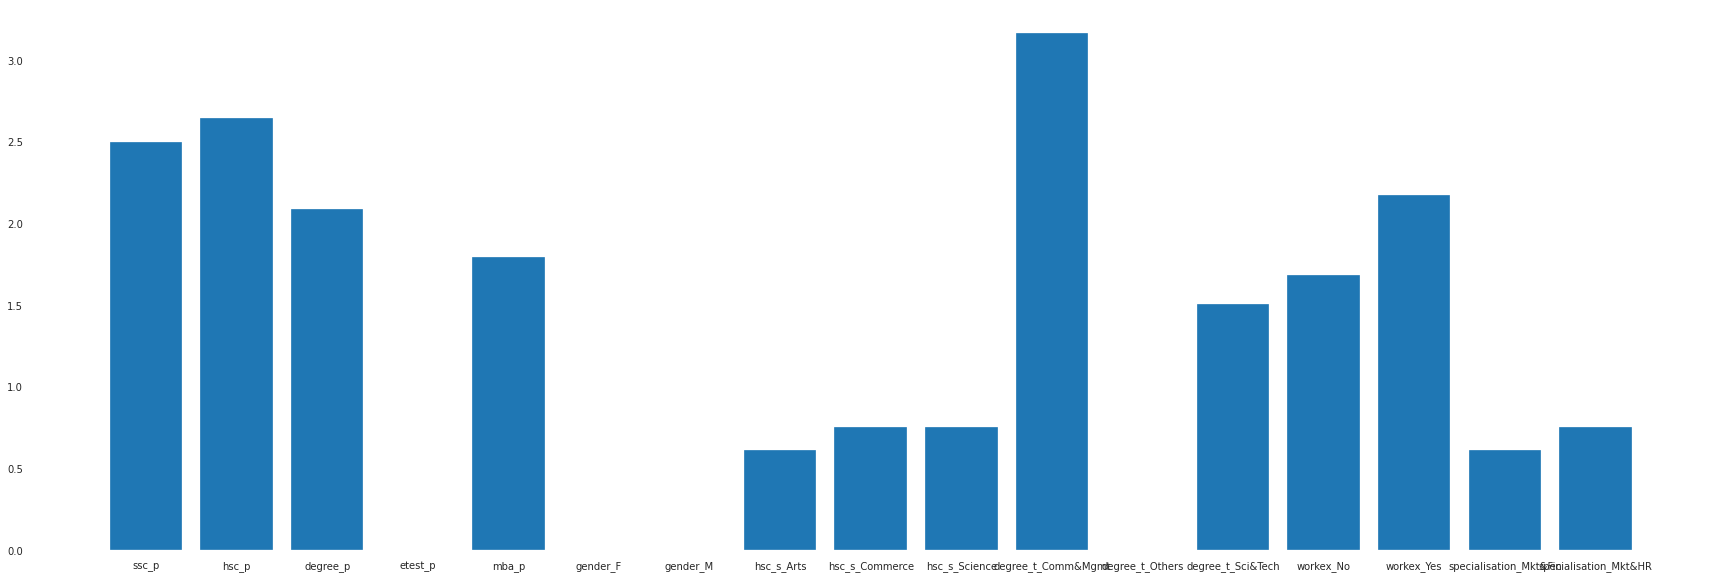

In [55]:
plt.figure(figsize=(30, 10))
plt.bar(colmunn_names , perm.feature_importances_std_ * 100)
plt.show()

**From Feature Importance of Tree-based Algorithms and MDA we can conclude that:**
* Academic performance affects placement (All percentages had importantance)
* Work Experience Effects Placement
* Gender and Specialization in Commerse (in higher-seondary and undergraduate) also has effect on placements.

## Prediction of Salary (Regression Analysis)

In [56]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, r2_score

### Data Preprocessing

In [57]:
#dropping NaNs (in Salary)
data_reg.dropna(inplace=True)
#dropping Status = "Placed" column
data_reg.drop("status", axis=1, inplace=True)

In [58]:
data_reg.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,0,67.00,91.00,0,58.00,1,0,55.0,0,58.80,270000.0
1,0,79.33,78.33,1,77.48,1,1,86.5,1,66.28,200000.0
2,0,65.00,68.00,2,64.00,0,0,75.0,1,57.80,250000.0
4,0,85.80,73.60,0,73.30,0,0,96.8,1,55.50,425000.0
7,0,82.00,64.00,1,66.00,1,1,67.0,1,62.14,252000.0


In [59]:
#Seperating Depencent and Independent Vaiiables
y = data_reg["salary"] #Dependent Variable
X = data_reg.drop("salary", axis=1)
column_names = X.columns.values

In [60]:
#Scalizing between 0-1 (Normalization)
X_scaled = MinMaxScaler().fit_transform(X)

### Feature Selection

** Not all features are significant. Thus, let's perform a feature selection procedure**

![Sequential Forward Feature Selection](https://quantifyinghealth.com/wp-content/uploads/2019/10/backward-stepwise-algorithm.png)

**Determining Least Significant Variable**

The least significant variable is a variable which:

- has the highest p-value
- Removing it reduces R2 to lowest value compared to other features
- Removing it has least increment in residuals-sum-of-squares (RSS)


### Outliers' Removal

Feature Selecton cannot perform well in presence of outliers. Lets identy and remove outliers before proceding

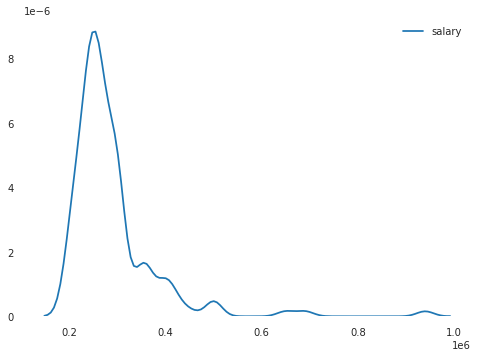

In [61]:
#PDF of Salary
sns.kdeplot(y)
plt.show()

It is clear that very few students have salary greater than 400,000 (hence outliers)

In [62]:
#Selecting outliers
y[y > 400000]
# 9 records

4      425000.0
39     411000.0
53     450000.0
77     500000.0
95     420000.0
119    940000.0
150    690000.0
163    500000.0
174    500000.0
177    650000.0
Name: salary, dtype: float64

In [63]:
#Removing these Records from data
X_scaled = X_scaled[y < 400000]
y = y[y < 400000]

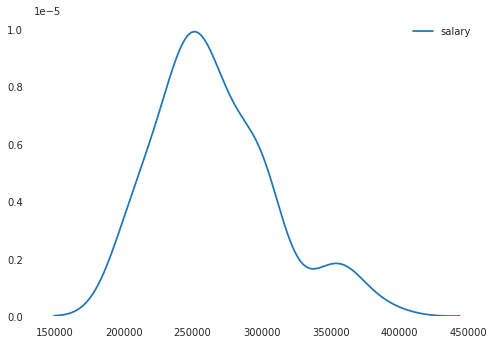

In [64]:
#PDF of Salary without outliers. Still skewed though
sns.kdeplot(y)
plt.show()

### 1. Determining Least Significant Variable by R2 Score

In [65]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

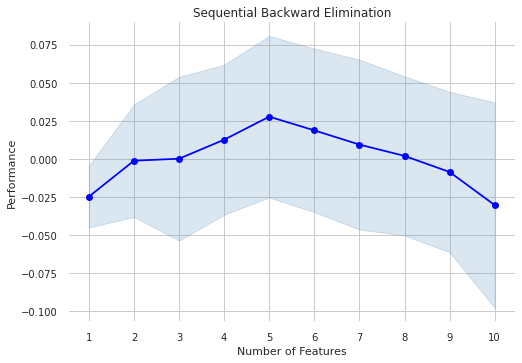

In [66]:
linreg = LinearRegression()
sfs = SFS(linreg, k_features=1, forward=False, scoring='r2',cv=10)
sfs = sfs.fit(X_scaled, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Backward Elimination')
plt.grid()
plt.show()
#From Plot its clear that, many features actually decrease the performance

In [67]:
# Lets see the top 5 most significant features
top_n = 5
sfs.get_metric_dict()[top_n]

{'feature_idx': (0, 3, 5, 7, 9),
 'cv_scores': array([-0.09997564, -0.11551795,  0.14652782,  0.19241391, -0.19535134,
        -0.13235138, -0.03896556,  0.3116134 ,  0.13836643,  0.07020936]),
 'avg_score': 0.027696903219017056,
 'feature_names': ('0', '3', '5', '7', '9'),
 'ci_bound': 0.11802751969012426,
 'std_dev': 0.15891404557580263,
 'std_err': 0.05297134852526754}

In [68]:
#Top N Features
top_n_indices = list(sfs.get_metric_dict()[top_n]['feature_idx'])
print(f"Most Significant {top_n} Features:")
for col in column_names[top_n_indices]:
    print(col)

Most Significant 5 Features:
gender
hsc_s
degree_t
etest_p
mba_p


In [69]:
#Select these Features only
X_selected = X_scaled[: ,top_n_indices]
lin_reg = LinearRegression()
lin_reg.fit(X_selected, y)
y_pred = lin_reg.predict(X_selected)
print(f"R2 Score: {r2_score(y, y_pred)}")
print(f"MAE: {mean_absolute_error(y, y_pred)}")

R2 Score: 0.1101660718969637
MAE: 30630.128295211573


This is the best I could do with Linear Regression

### 2. Determining Least Significant Variable by P-Value

If the base model gives 0.7 R2 score and the model without a feature gives 0.75 R2 score, we cannot conclude that feature makes the difference, as the score may vary in another trial; in 10 trials the R2 score might change in +/- 0.05. However, if model only varies in +/- 0.01, we can then say that removing a feature made the model better.

Our null hypothesis is that there is no difference between the two samples of R2 scores.

P-value is the probability that you would arrive at the same results as the null hypothesis. One of the most commonly used p-value is 0.05. If the calculated p-value turns out to be less than 0.05, the null hypothesis is considered to be false, or nullified (hence the name null hypothesis). And if the value is greater than 0.05, the null hypothesis is considered to be true.

For a feature, a small p-value indicates that it is unlikely we will observe a relationship between the predictor (feature) and response (salary in our case) variables due to chance.

Thus, we start with all features. We compute the P-values. We eliminate frature with highest p-value until p-values of all features reach below threshold: 0.05. 

![Determining Least Significant Variable by P-Value](https://miro.medium.com/max/1400/1*Jub_nEYtN0htxFpTRzRtBQ.png)



In [70]:
#Converting to DF for as  column names gives readibility
X_scaled = pd.DataFrame(X_scaled, columns=column_names)
y = y.values

# We must add a constants 1s for intercept before doing Linear Regression with statsmodel
X_scaled = sm.add_constant(X_scaled)
X_scaled.head()
#Constants 1 added for intercept term

,const,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1.0,0.0,0.445545,0.857051,0.0,0.057143,0.5,0.0,0.104167,0.0,0.251666
1,1.0,0.0,0.750743,0.586729,0.5,0.613714,0.5,1.0,0.760417,1.0,0.544884
2,1.0,0.0,0.396040,0.366332,1.0,0.228571,0.0,0.0,0.520833,1.0,0.212466
3,1.0,0.0,0.816832,0.280990,0.5,0.285714,0.5,1.0,0.354167,1.0,0.382595
4,1.0,0.0,0.594059,0.601024,0.0,0.457143,0.0,0.0,0.861250,1.0,0.349275


In [71]:
# Step 1: With all Features
model = sm.OLS(y, X_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     1.722
Date:                Fri, 24 Apr 2020   Prob (F-statistic):             0.0829
Time:                        20:36:43   Log-Likelihood:                -1608.4
No. Observations:                 134   AIC:                             3239.
Df Residuals:                     123   BIC:                             3271.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.625e+05   1.28e+04     20.498      0.000    2.37e+05    2.88e+05
gender         -1.784e+04   8299.998     -2.149      0.034   -3.43e+04   -1406.775
ssc_p           -116.6148   2.04e+04     -0.006      0.995   -4.04e+04    4.02e+04
hsc_p          -1.842e+04   2.13e+04     -0.864      0.389   -6.06e+04    2.38e+04
hsc_s          -2.775e+04   1.58e+04     -1.761      0.081    -5.9e+04    3444.983
degree_p       -9885.6991   2.25e+04     -0.438      0.662   -5.45e+04    3.47e+04
degree_t        3.947e+04   1.69e+04      2.340      0.021    6077.584    7.29e+04
workex         -7748.2212   7673.070     -1.010      0.315   -2.29e+04    7440.151
etest_p         1.839e+04   1.43e+04      1.286      0.201   -9906.447    4.67e+04
specialisation  2457.2424   8013.710      0.307      0.760   -1.34e+04    1.83e+04
mba_p           3.704e+04   2.11e+04      1.756      0.082   -4717.648    7.88e+04
==============================================================================
Omnibus:                       10.852   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.041
Skew:                           0.661   Prob(JB):                      0.00400
Kurtosis:                       3.477   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# Identify max P-value (P>|t|) column
# Feature ssc_p has 0.995
#drop ssc_p
X_scaled = X_scaled.drop('ssc_p', axis=1)
model = sm.OLS(y, X_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     1.929
Date:                Fri, 24 Apr 2020   Prob (F-statistic):             0.0536
Time:                        20:36:43   Log-Likelihood:                -1608.4
No. Observations:                 134   AIC:                             3237.
Df Residuals:                     124   BIC:                             3266.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.625e+05    1.2e+04     21.888      0.000    2.39e+05    2.86e+05
gender         -1.784e+04   8177.285     -2.182      0.031    -3.4e+04   -1657.933
hsc_p          -1.845e+04   2.08e+04     -0.888      0.376   -5.96e+04    2.27e+04
hsc_s          -2.775e+04   1.57e+04     -1.768      0.080   -5.88e+04    3315.162
degree_p       -9910.8456    2.2e+04     -0.450      0.653   -5.35e+04    3.37e+04
degree_t        3.946e+04   1.66e+04      2.379      0.019    6636.236    7.23e+04
workex         -7750.7686   7629.205     -1.016      0.312   -2.29e+04    7349.566
etest_p         1.837e+04    1.4e+04      1.313      0.192   -9329.141    4.61e+04
specialisation  2457.7237   7980.893      0.308      0.759   -1.33e+04    1.83e+04
mba_p           3.702e+04   2.07e+04      1.785      0.077   -4031.562    7.81e+04
==============================================================================
Omnibus:                       10.856   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.044
Skew:                           0.662   Prob(JB):                      0.00400
Kurtosis:                       3.477   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# specialisation has max P-Value and is greater than 0.05
# Identify max P-value (P>|t|) column
# Feature specialisation has 0.759
#drop specialisation
X_scaled = X_scaled.drop('specialisation', axis=1)
model = sm.OLS(y, X_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     2.174
Date:                Fri, 24 Apr 2020   Prob (F-statistic):             0.0337
Time:                        20:36:43   Log-Likelihood:                -1608.5
No. Observations:                 134   AIC:                             3235.
Df Residuals:                     125   BIC:                             3261.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.631e+05   1.18e+04     22.325      0.000     2.4e+05    2.86e+05
gender     -1.803e+04   8125.382     -2.219      0.028   -3.41e+04   -1947.873
hsc_p      -1.818e+04   2.07e+04     -0.879      0.381   -5.91e+04    2.27e+04
hsc_s      -2.751e+04   1.56e+04     -1.761      0.081   -5.84e+04    3404.719
degree_p   -9755.3753   2.19e+04     -0.445      0.657   -5.32e+04    3.37e+04
degree_t    3.873e+04   1.64e+04      2.368      0.019    6364.266    7.11e+04
workex     -7456.0032   7541.467     -0.989      0.325   -2.24e+04    7469.497
etest_p     1.946e+04   1.35e+04      1.442      0.152   -7245.962    4.62e+04
mba_p       3.768e+04   2.06e+04      1.833      0.069   -3001.026    7.84e+04
==============================================================================
Omnibus:                       10.497   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.615
Skew:                           0.652   Prob(JB):                      0.00496
Kurtosis:                       3.449   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# degree_p has max P-Value and is greater than 0.05
# Increase in Adjusted R2
# Feature degree_p has 0.657
#drop degree_p
X_scaled = X_scaled.drop('degree_p', axis=1)
model = sm.OLS(y, X_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     2.472
Date:                Fri, 24 Apr 2020   Prob (F-statistic):             0.0207
Time:                        20:36:43   Log-Likelihood:                -1608.6
No. Observations:                 134   AIC:                             3233.
Df Residuals:                     126   BIC:                             3256.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.612e+05   1.09e+04     23.894      0.000     2.4e+05    2.83e+05
gender     -1.829e+04   8078.003     -2.264      0.025   -3.43e+04   -2305.781
hsc_p      -1.811e+04   2.06e+04     -0.879      0.381   -5.89e+04    2.27e+04
hsc_s      -2.755e+04   1.56e+04     -1.770      0.079   -5.84e+04    3258.454
degree_t    3.908e+04   1.63e+04      2.400      0.018    6849.080    7.13e+04
workex     -7234.3566   7500.982     -0.964      0.337   -2.21e+04    7609.865
etest_p     1.892e+04   1.34e+04      1.413      0.160   -7588.269    4.54e+04
mba_p       3.395e+04   1.87e+04      1.815      0.072   -3075.868     7.1e+04
==============================================================================
Omnibus:                        9.867   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.869
Skew:                           0.632   Prob(JB):                      0.00719
Kurtosis:                       3.414   Cond. No.                         9.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# workex has max P-Value and is greater than 0.05
# Increase in Adjusted R2
# Feature workex has 0.337
#drop workex
X_scaled = X_scaled.drop('workex', axis=1)
model = sm.OLS(y, X_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     2.731
Date:                Fri, 24 Apr 2020   Prob (F-statistic):             0.0158
Time:                        20:36:43   Log-Likelihood:                -1609.1
No. Observations:                 134   AIC:                             3232.
Df Residuals:                     127   BIC:                             3252.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.587e+05   1.06e+04     24.390      0.000    2.38e+05     2.8e+05
gender     -1.695e+04   7954.290     -2.130      0.035   -3.27e+04   -1205.502
hsc_p       -1.57e+04   2.05e+04     -0.768      0.444   -5.62e+04    2.48e+04
hsc_s      -2.732e+04   1.56e+04     -1.756      0.082   -5.81e+04    3475.433
degree_t    3.692e+04   1.61e+04      2.289      0.024    5007.687    6.88e+04
etest_p     1.851e+04   1.34e+04      1.383      0.169   -7973.899     4.5e+04
mba_p       3.026e+04   1.83e+04      1.652      0.101   -5976.217    6.65e+04
==============================================================================
Omnibus:                       10.687   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.841
Skew:                           0.657   Prob(JB):                      0.00442
Kurtosis:                       3.464   Cond. No.                         9.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# hsc_p has max P-Value and is greater than 0.05
# Increase in Adjusted R2
# Feature hsc_p has 0.444
#drop hsc_p
X_scaled = X_scaled.drop('hsc_p', axis=1)
model = sm.OLS(y, X_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     3.169
Date:                Fri, 24 Apr 2020   Prob (F-statistic):            0.00989
Time:                        20:36:43   Log-Likelihood:                -1609.4
No. Observations:                 134   AIC:                             3231.
Df Residuals:                     128   BIC:                             3248.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.54e+05   8709.454     29.166      0.000    2.37e+05    2.71e+05
gender     -1.662e+04   7930.563     -2.096      0.038   -3.23e+04    -932.780
hsc_s      -2.429e+04    1.5e+04     -1.616      0.109    -5.4e+04    5449.602
degree_t    3.585e+04    1.6e+04      2.235      0.027    4109.638    6.76e+04
etest_p     1.699e+04   1.32e+04      1.286      0.201   -9159.115    4.31e+04
mba_p       2.598e+04   1.74e+04      1.492      0.138   -8477.690    6.04e+04
==============================================================================
Omnibus:                       10.995   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.213
Skew:                           0.660   Prob(JB):                      0.00367
Kurtosis:                       3.514   Cond. No.                         7.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# etest_p has max P-Value and is greater than 0.05
# Slight Decrease in Adjusted R2..
# Feature etest_p has 0.2
#drop etest_p
X_scaled = X_scaled.drop('etest_p', axis=1)
model = sm.OLS(y, X_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     3.531
Date:                Fri, 24 Apr 2020   Prob (F-statistic):            0.00906
Time:                        20:36:43   Log-Likelihood:                -1610.2
No. Observations:                 134   AIC:                             3230.
Df Residuals:                     129   BIC:                             3245.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         2.6e+05   7381.856     35.222      0.000    2.45e+05    2.75e+05
gender     -1.869e+04   7785.194     -2.401      0.018   -3.41e+04   -3290.661
hsc_s      -2.542e+04    1.5e+04     -1.690      0.093   -5.52e+04    4339.278
degree_t    3.736e+04    1.6e+04      2.329      0.021    5627.331    6.91e+04
mba_p       3.305e+04   1.66e+04      1.995      0.048     274.034    6.58e+04
==============================================================================
Omnibus:                       12.014   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.481
Skew:                           0.703   Prob(JB):                      0.00195
Kurtosis:                       3.511   Cond. No.                         6.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# hsc_s has max P-Value and is greater than 0.05
# Drastic Decrease in Adjusted R2..
# Feature hsc_s has 0.09
#drop hsc_s
X_scaled = X_scaled.drop('hsc_s', axis=1)
model = sm.OLS(y, X_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     3.703
Date:                Fri, 24 Apr 2020   Prob (F-statistic):             0.0135
Time:                        20:36:43   Log-Likelihood:                -1611.7
No. Observations:                 134   AIC:                             3231.
Df Residuals:                     130   BIC:                             3243.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.573e+05   7260.622     35.441      0.000    2.43e+05    2.72e+05
gender     -2.036e+04   7777.446     -2.618      0.010   -3.57e+04   -4973.494
degree_t    2.202e+04   1.33e+04      1.654      0.101   -4325.122    4.84e+04
mba_p       3.138e+04   1.67e+04      1.884      0.062   -1567.309    6.43e+04
==============================================================================
Omnibus:                       13.932   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.967
Skew:                           0.773   Prob(JB):                     0.000562
Kurtosis:                       3.539   Cond. No.                         5.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
#Stopping here. mba_p -> 0.06 only a bit higher than 0.05

Thus, Top 5 Features affecting salary we identified are:
* gender -> Gender
* degree_t -> Under Graduation(Degree type)- Field of degree education
* mba_p -> MBA percentage
* hsc_s -> Specialization in Higher Secondary Education
* etest_p -> Employability test percentage 


(Same as with Sequential Feature Selection with mlxtend considering R2)

#### Do Upvote if you like my notebook.
#### Thanks